In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [0]:
#Creamos el dataset
  
n = 500
p = 2
X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)
Y = Y[:, np.newaxis]

In [0]:
X[0:9,:], Y[0:9,:]

(array([[-0.15178226,  1.0090278 ],
        [ 0.44765941,  0.01481756],
        [-0.66164555, -0.7660927 ],
        [ 0.40807034, -0.35682068],
        [ 0.9484655 ,  0.34903864],
        [ 0.90733282,  0.49609846],
        [ 0.39443771,  0.28704794],
        [-0.0394515 , -1.01626298],
        [ 0.4360465 ,  0.18593485]]), array([[0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1]]))

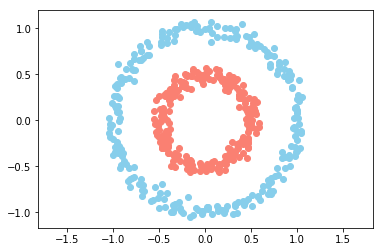

In [0]:

plt.scatter(X[ Y[:, 0] == 0 ,0], X[Y[:, 0] == 0, 1], c = 'skyblue')
plt.scatter(X[ Y[:, 0] == 1 ,0], X[Y[:, 0] == 1, 1], c = 'salmon')
plt.axis("equal")
plt.show()

In [0]:
#Clase de una capa de la red
class NeuralLayer:
  #n_conexiones -> las que le entran de la capa anterior
  def __init__(self, n_conexiones, n_neur, activation_func):
    self.activation_fun = activation_func #Funcion que distorsionará
    """
    Vector columna con el numero de neuronas, como queremos que vaya de -1 a 1
    lo multiplicamos por 2 y le restamos 1, hacemos lo mismo para el bias y para 
    la matriz W
    """
    self.b = np.random.rand(1, n_neur) * 2 - 1 
    self.W = np.random.rand(n_conexiones, n_neur) * 2 -1

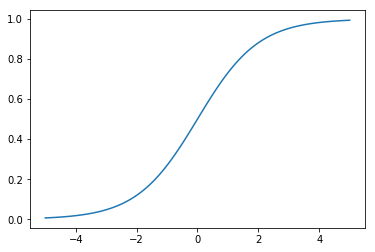

In [0]:
#FUNCIONES DE ACTIVACIÓN

sign = (lambda x: 1 / (1+np.e ** (-x)), #Función sigmoide (de 0 a 1)
        lambda x: x * (1-x)) #Derivada de la función sigmoide

_x = np.linspace(-5, 5, 100)   #Vector de 100 valores entre -5 y 5

t = sign[0](_x)

plt.plot(_x, t)


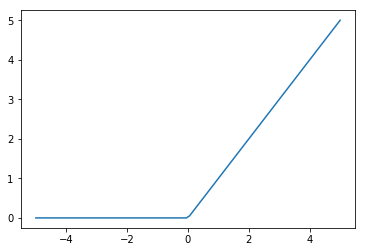

In [0]:
relu = lambda x: np.maximum(0, x) #Si x < 0 -> 0. si x > 0 ->x
plt.plot(_x, relu(_x))

In [0]:
#Función del error cuadrático medio 
l2_cost = (lambda Ypredecida, Yreal : np.mean((Ypredecida - Yreal) ** 2),
           lambda Yp, Yr : (Yp-Yr)) #Derivada de la función del error cuadrático medio 

In [0]:
"""
La red se podría crear así, pero no es eficiente,
por lo que haremos una función

capa_0 = neural_layer(p, 4, sign)
capa_1 = neural_layer(4, 8, sign)
"""


"""
Podriamos tener una función de activación diferente en cada capa, pero por 
simplicidad, solo vamos a variar el número de neuronas que tendremos en cada 
capa
""" 
def crear_red(topology, act_f):
  nn = [] #Vector que tendrá todas las capas de la red neuronal
  for l, layer in enumerate(topology[:-1]):
    nn.append(NeuralLayer(topology[l], topology[l+1], act_f))
  return nn





![Fórmulas backpropagation](http://neuralnetworksanddeeplearning.com/images/tikz21.png)

In [0]:
#Vector de la topología de la red, que indica cuantas neuronas tiene cada capa
topologia_red = [p, 4, 8, 1]

neural_net = crear_red(topologia_red, sign)

"""
En esta función se implementará todo el código de la lógica de la red neuronal, 
esto incluye:
1 - El dato de entrada y de salida, con esto la red neuronal va a ir 
procesando hacia adelante hasta dar un valor.
2- Una vez con el resultado, se compararía con el vector Y con la función de 
coste, lo que generará un error con este valor puede hacer back propagation para 
así calcular las derivadas parciales de la ponderación
3-Con las derivadas parciales, podemos ejecutar el algoritmo del descenso del 
gradiente, lo que permite optimizar la función de coste y entrenar la red 
"""
def train(neural_net, X, Y, l2_cost, lr = 0.5, train = True): #X: Datos de entrada Y: Datos de salida
  #lr = learning rate, que tan grande da los pasos el descenso del gradiente
  
  """
  Paso hacia adelante, coger el vector de entrada y pasarlo capa por capa 
  haciendo las operaciones necesarias
  """
  #Vector que tendrá el valor de Z de una capa y el valor de f_act(Z) en esa capa
  vector_salida = [(None, X)]
  for l, layer in enumerate(neural_net):
    """
    Implementación de la suma ponderada, el @ significa una multiplicación 
    matricial, y esto lo multiplicamos por los parámetros que tiene esta capa
    """
    Z = vector_salida[-1][1] @ neural_net[l].W + neural_net[l].b #Z = XY + b 
    #Distorsion
    a = neural_net[l].activation_fun[0](Z)  
    vector_salida.append((Z, a))
  
  
  if train:
    """
    Aquí haremos
    #Paso hacia atras back propagation
    #Descenso del gradiente
    """
    
    #Backpropagation
    deltas = []
    for l in reversed(range(0, len(neural_net))):
      z = vector_salida[l+1][0]
      a = vector_salida[l+1][1]
      
      #Calcularemos delta de la última capa
      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].activation_fun[1](a))
        
      else: #Calcula del delta de las otras capas
        deltas.insert(0, deltas[0] @ Wtemp.T * neural_net[l].activation_fun[1](a))
      
      
      #Para tomar el valor que aun no ha sido optimizado con el descenso del gradiente
      Wtemp = neural_net[l].W
      #Actualización de parámetros a partir del descenso del gradiente
      
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis = 0, keepdims = True) * lr
      neural_net[l].W = neural_net[l].W -  vector_salida[l][1].T @ deltas[0] * lr
      
  return vector_salida[-1][1]
train(neural_net, X, Y, l2_cost, 0.5)
print()

In [0]:
import time
from IPython.display import clear_output

def hola(show = True):
  neural_n = crear_red(topologia_red, sign)
  loss = [0.3] 
  i = 0
  while loss[-1] > 0.005:
  
    #Entrenar la red
    pY = train(neural_n, X, Y, l2_cost, lr = 0.05)
    
    if i % 50 == 0: #Cada 50 iteraciones
      loss.append(l2_cost[0](pY, Y))
      if show:
        res = 50
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        _Y = np.zeros((res, res))
        for i0, x0 in enumerate(_x0):
          for i1, x1 in enumerate(_x1):
            _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train = False)[0][0]
        plt.pcolormesh(_x0, _x1, _Y, cmap = "coolwarm")
        plt.axis("equal")
        plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c = "skyblue")
        plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c = "salmon")
        clear_output(wait = True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.3)
    i += 1
  return (neural_n, pY)

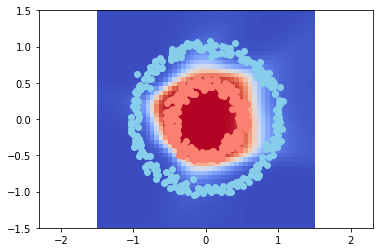

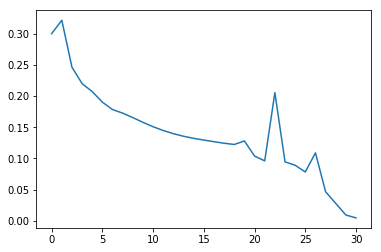

In [0]:
red_entrenada, pY =  hola()



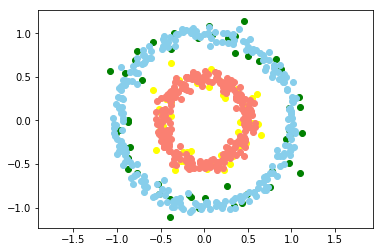

In [0]:
n_nuevos = 100

nuevos_datos = make_circles(n_samples = n_nuevos, factor = 0.5, noise = 0.1)[0]



valores = train(red_entrenada, nuevos_datos, None, l2_cost, None, False)

Ynuevos = np.zeros((n_nuevos, 1))
for index, value in enumerate(valores):
  if value < 0.5:
    Ynuevos[index] = 0
  else:
    Ynuevos[index] = 1

plt.scatter(nuevos_datos[ Ynuevos[:, 0] == 0 ,0], nuevos_datos[Ynuevos[:, 0] == 0, 1], c = 'green')
plt.scatter(nuevos_datos[ Ynuevos[:, 0] == 1 ,0], nuevos_datos[Ynuevos[:, 0] == 1, 1], c = 'yellow')

plt.scatter(X[ Y[:, 0] == 0 ,0], X[Y[:, 0] == 0, 1], c = 'skyblue')
plt.scatter(X[ Y[:, 0] == 1 ,0], X[Y[:, 0] == 1, 1], c = 'salmon')
plt.axis("equal")
plt.show()